In [1]:
%%time
from pathlib import Path
import matplotlib.pyplot as plt
from Dataprocessing import prep_hindcast
import seaborn as sns
import numpy as np
cm = 1/2.54  # centimeters in inches (for matplotlib figsize)
savefigsto = Path().cwd() / "Figures"

CPU times: total: 8.83 s
Wall time: 22.2 s


CPU times: total: 31 s
Wall time: 2min 13s


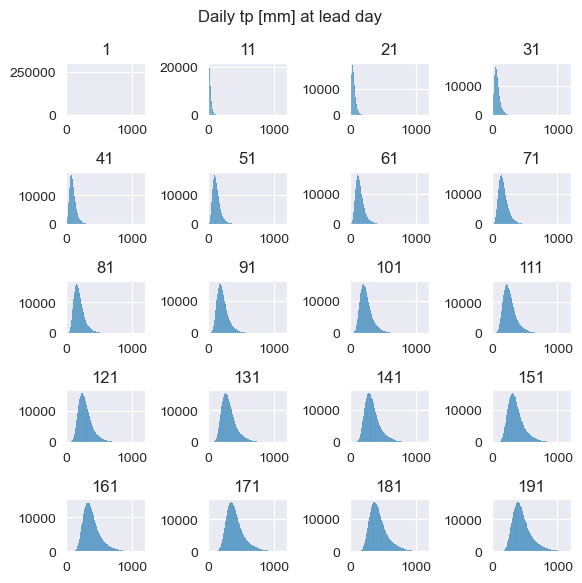

In [2]:
%%time
leadtime = np.arange(0, 200, 10)
fig, ax = plt.subplots(figsize=(15 * cm, 15 * cm), ncols=4, nrows=5)
for i, lt in enumerate(leadtime):
    hc = prep_hindcast("Z:\Massendaten\ECMWF\SEAS5_Box", "*total_precipitation.nc", lt)["tp"]
    hc *= 1000  # convert to mm
    sns.histplot(hc.values.flat, bins=200, ax=ax.flat[i])
    ax.flat[i].set_xlim(left=0, right=1200)
    ax.flat[i].set(title=f"{lt + 1}")
    ax.flat[i].set(ylabel=None)
fig.suptitle("Daily tp [mm] at lead day")
plt.tight_layout()
fig.savefig(savefigsto / f"SEAS5_lead_histograms.png", dpi=300)